In [4]:
import pandas as pd
import numpy as np
import glob

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
pd.isnull(df).sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [7]:
df.select_dtypes(include=['object']).columns

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

In [9]:
category_columns =['Cloud Cover', 'Season', 'Location', 'Weather Type']

encode_df = pd.get_dummies(df, columns=category_columns, drop_first=True)

print("Encoded Dataset:")
display(encode_df.head())

Encoded Dataset:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,14.0,73,9.5,82.0,1010.82,2,3.5,False,False,True,False,False,True,True,False,True,False,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,False,False,True,True,False,False,True,False,False,False,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,False,False,False,True,False,False,False,True,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,False,False,False,True,False,False,False,False,False,False,True
4,27.0,74,17.0,66.0,990.67,1,2.5,False,True,False,False,False,True,False,True,True,False,False


In [15]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [18]:
num_columns = encode_df.select_dtypes(include=['int64', 'float64', 'bool']).columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encode_df[num_columns] = scaler.fit_transform(encode_df[num_columns])
print("Scaled Dataset:")
display(encode_df.head())

Scaled Dataset:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,-0.179268,-0.925495,1.376494,-0.495023,-0.482414,1.163160,1.319418,-0.757538,1.732051,-0.57735,-0.577350
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,-0.179268,-0.925495,1.376494,2.020107,-0.482414,-0.859727,1.319418,-0.757538,-0.577350,-0.57735,-0.577350
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,-0.179268,-0.925495,-0.726483,2.020107,-0.482414,-0.859727,-0.757910,1.320065,-0.577350,-0.57735,1.732051
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,-0.179268,-0.925495,-0.726483,2.020107,-0.482414,-0.859727,-0.757910,-0.757538,-0.577350,-0.57735,1.732051
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,-0.179268,1.080503,-0.726483,-0.495023,-0.482414,1.163160,-0.757910,1.320065,1.732051,-0.57735,-0.577350


In [20]:
from sklearn.model_selection import train_test_split


X = encode_df.drop(['Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny'], axis=1)
y = encode_df[['Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10560, 15)
Shape of X_test: (2640, 15)
Shape of y_train: (10560, 3)
Shape of y_test: (2640, 3)


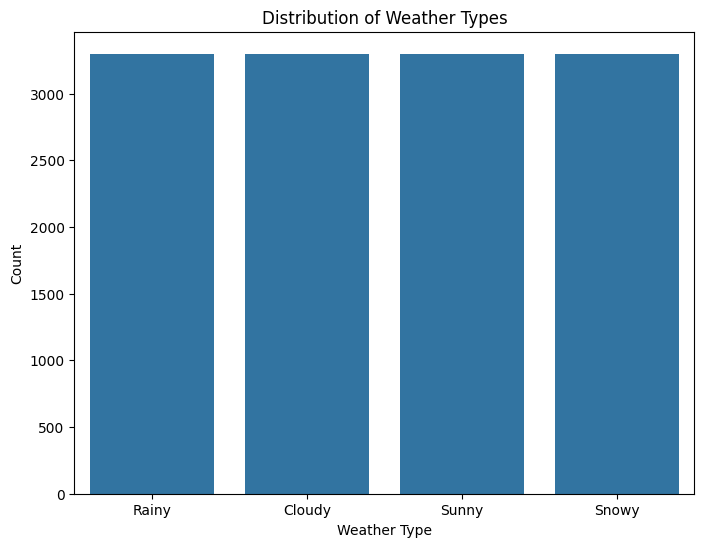

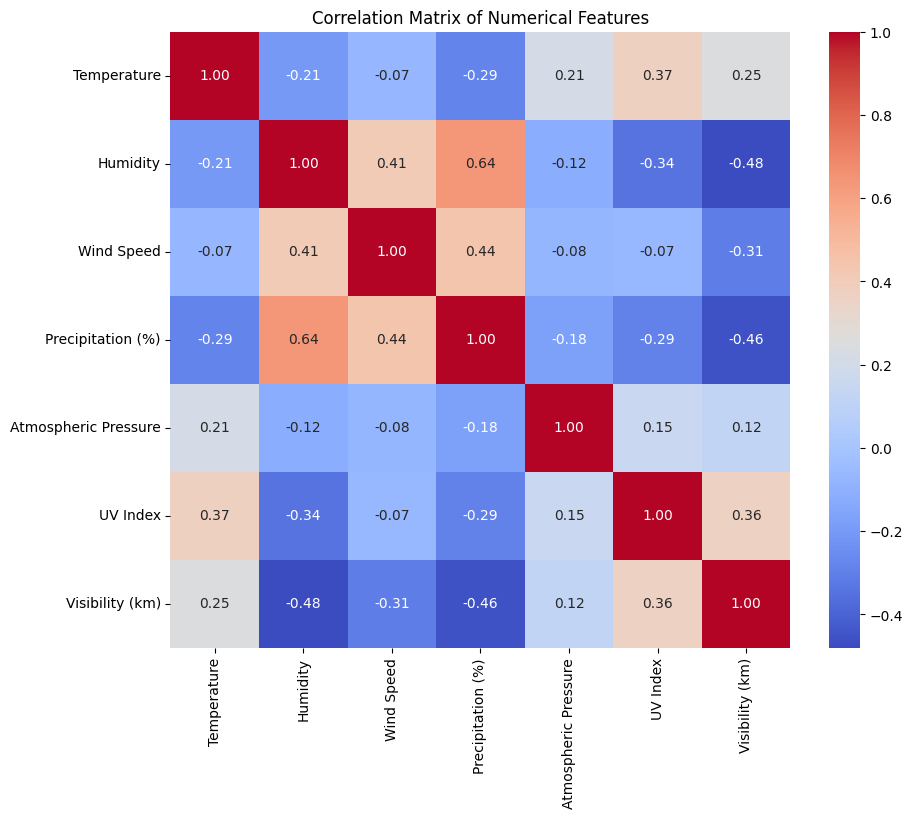

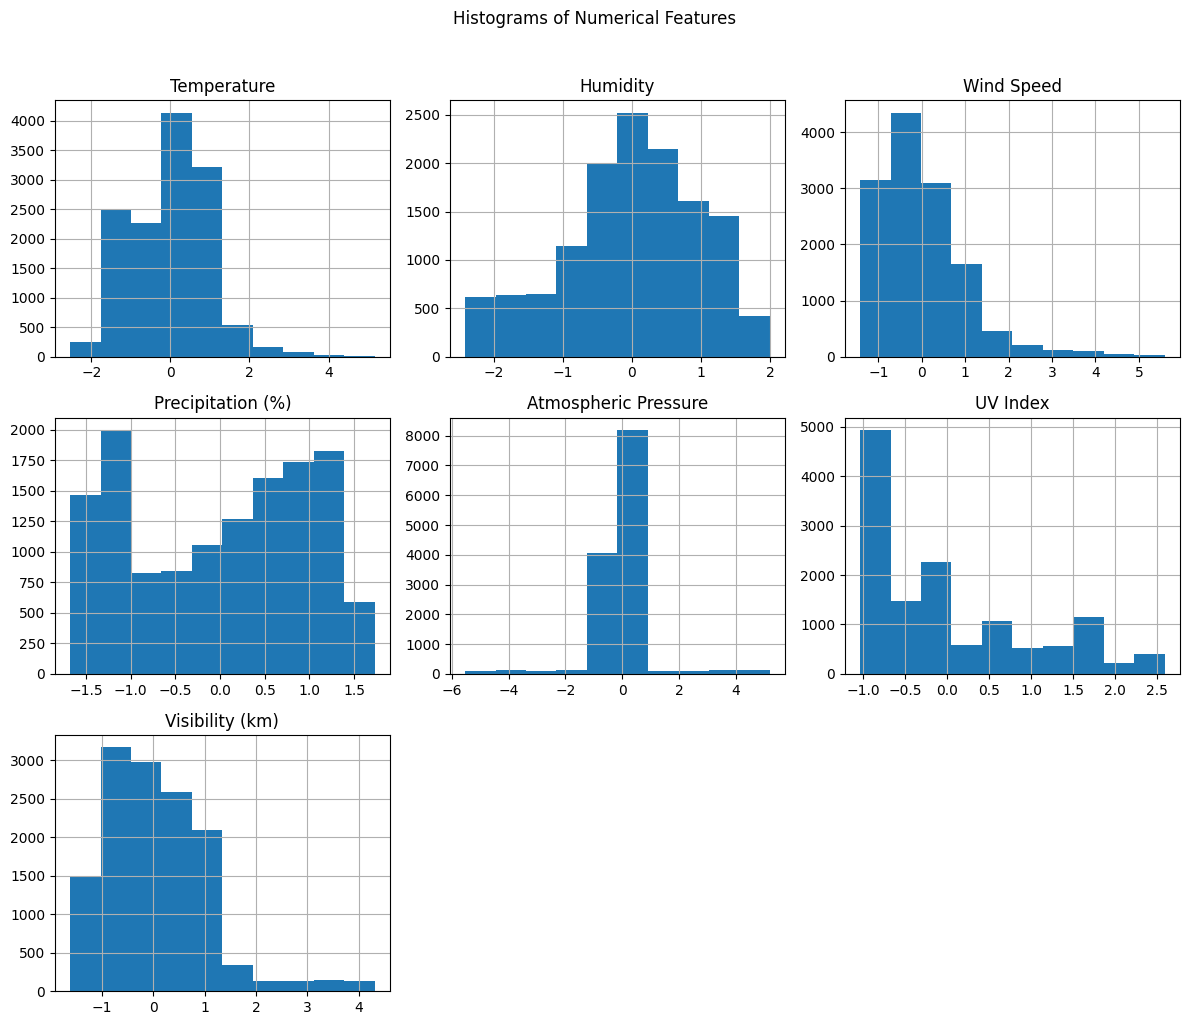

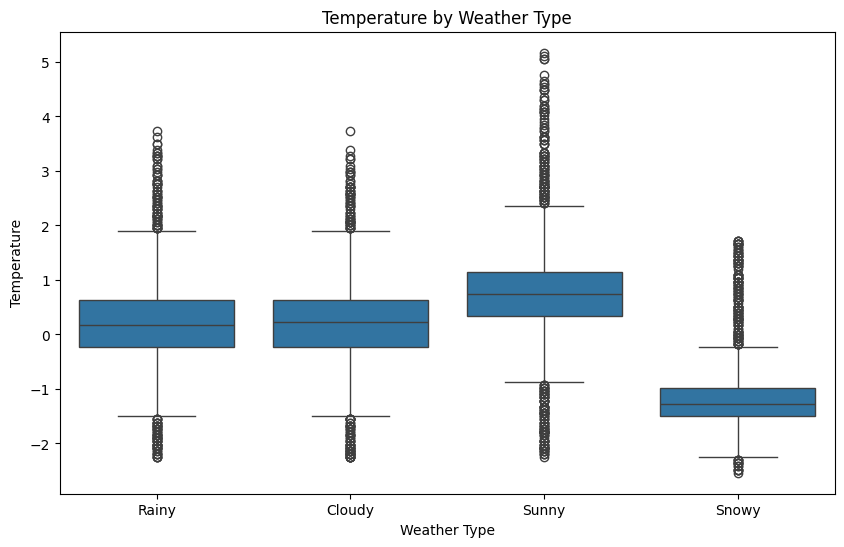

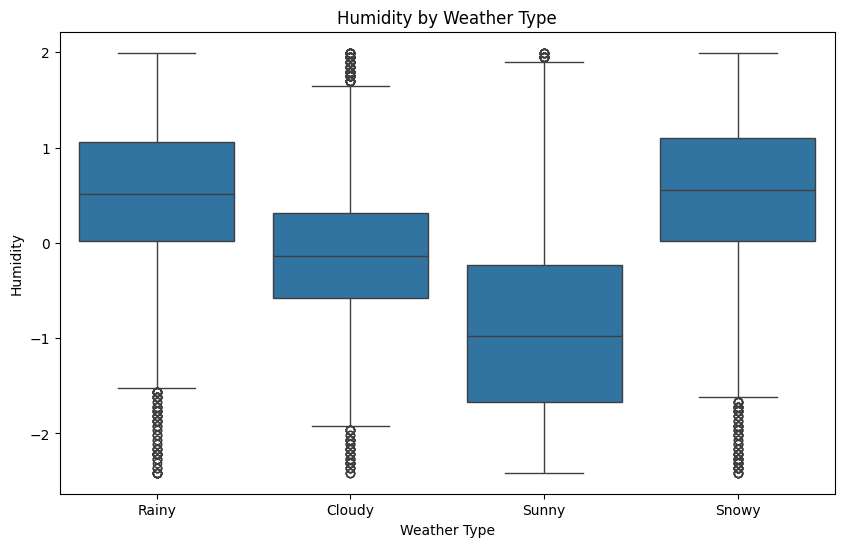

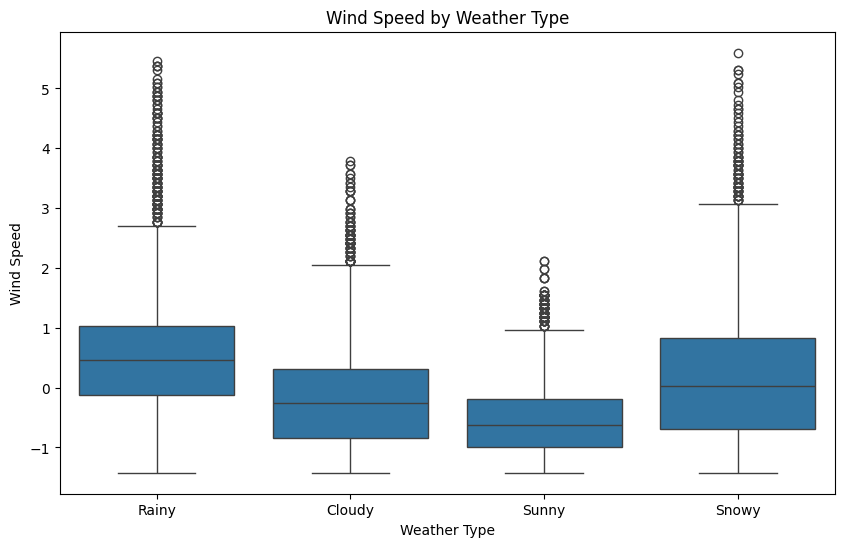

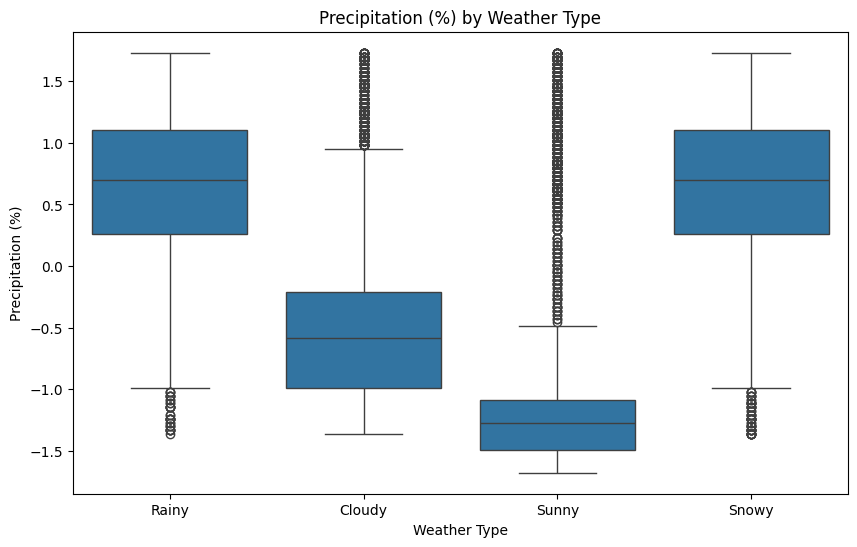

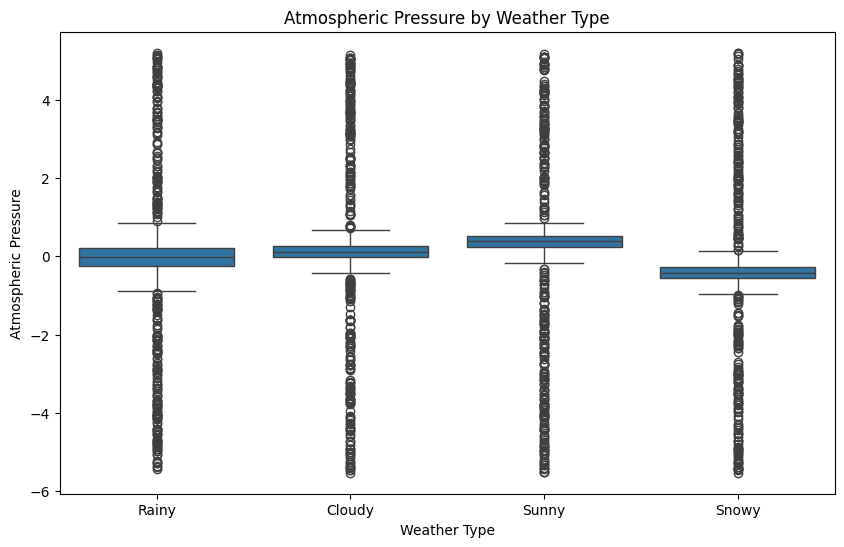

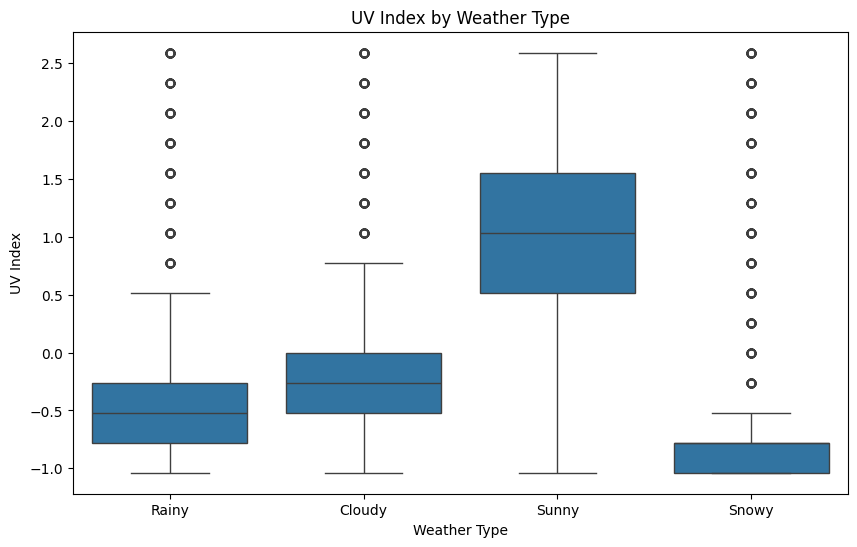

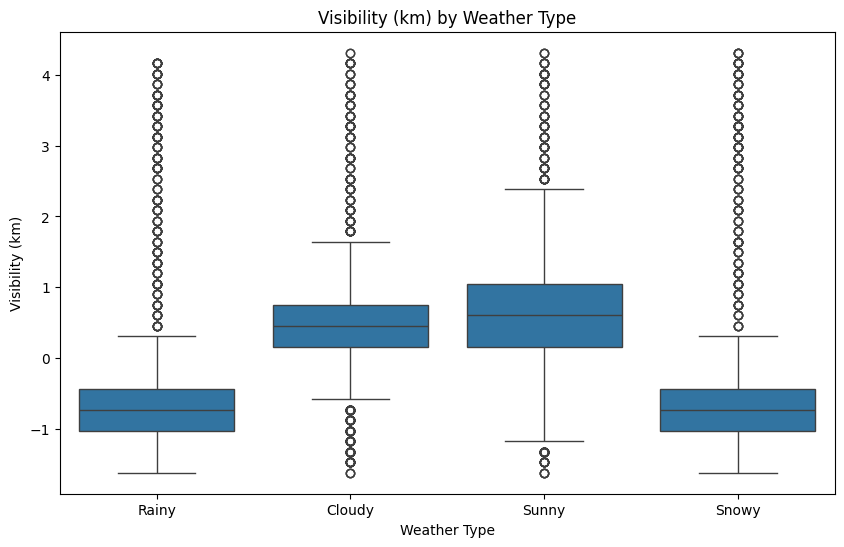

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns from the original df before encoding
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot class distribution of original 'Weather Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df)
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

# Plot correlation matrix of numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Plot histograms for numerical features
df[num_columns].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Plot box plots for numerical features by Weather Type
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Weather Type', y=col, data=df)
    plt.title(f'{col} by Weather Type')
    plt.xlabel('Weather Type')
    plt.ylabel(col)
    plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

model = DecisionTreeClassifier(random_state=42)


model.fit(X_train, y_train_labels)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

Accuracy: 0.9311

Classification Report:
                    precision    recall  f1-score   support

Weather Type_Rainy       0.94      0.95      0.94      1298
Weather Type_Snowy       0.93      0.94      0.94       701
Weather Type_Sunny       0.91      0.89      0.90       641

          accuracy                           0.93      2640
         macro avg       0.93      0.93      0.93      2640
      weighted avg       0.93      0.93      0.93      2640


Confusion Matrix:
[[1227   32   39]
 [  22  662   17]
 [  54   18  569]]


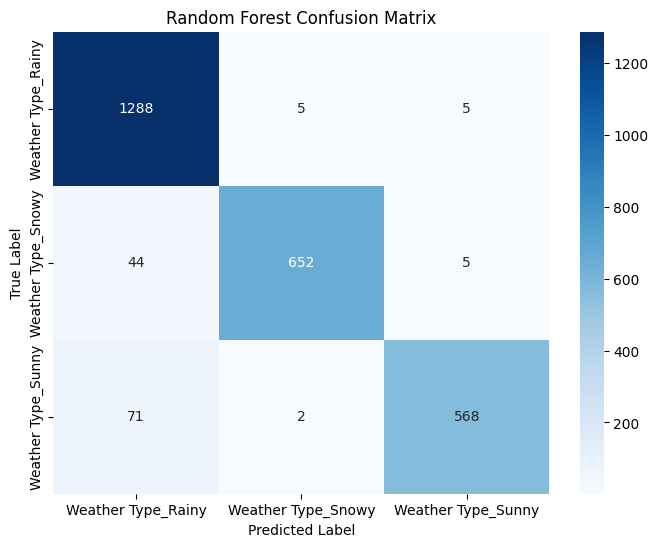

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test_labels, y_pred_rf)

# Get the class labels
class_labels = y_test_labels.unique()
class_labels.sort() # Sort the labels for consistent plotting

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train_labels)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_labels, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_labels, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_rf))

Random Forest Accuracy: 0.9500

Random Forest Classification Report:
                    precision    recall  f1-score   support

Weather Type_Rainy       0.92      0.99      0.95      1298
Weather Type_Snowy       0.99      0.93      0.96       701
Weather Type_Sunny       0.98      0.89      0.93       641

          accuracy                           0.95      2640
         macro avg       0.96      0.94      0.95      2640
      weighted avg       0.95      0.95      0.95      2640


Random Forest Confusion Matrix:
[[1288    5    5]
 [  44  652    5]
 [  71    2  568]]


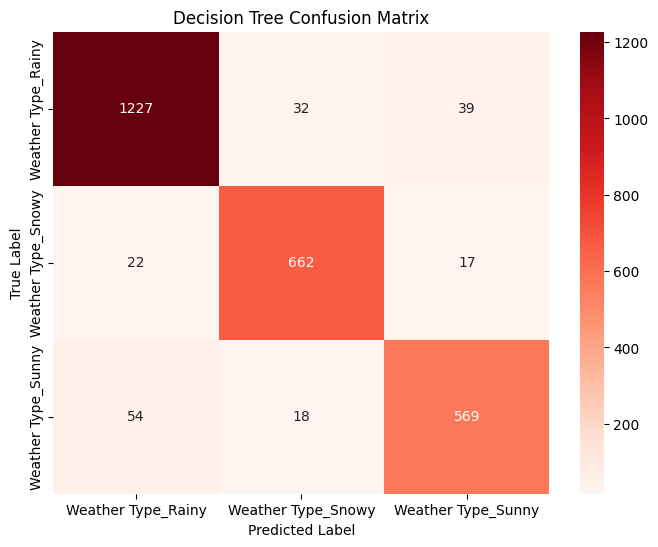

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test_labels, y_pred)

# Get the class labels
class_labels = y_test_labels.unique()
class_labels.sort() # Sort the labels for consistent plotting

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()